In [1]:
from pathlib import Path

# Главная папка проекта
project_name = "ico_data_pipeline"
project_root = Path(project_name)

# Создаем структуру папок
folders = [
    "data/raw",           # 60 файлов проектов
    "data/processed",     # CSV таблицы
    "data/examples",      # 2 примера меморандумов
    "analysis",           # для ноутбука
    "docs"               # документация
]

print("Создаем папки...")
for folder in folders:
    full_path = project_root / folder
    full_path.mkdir(parents=True, exist_ok=True)
    print(f"✅ {full_path}")

# Создаем файлы
files = [
    "requirements.txt",
    ".gitignore", 
    "docs/README.md"
    # analysis/ico_analysis.ipynb создадим отдельно
]

print("Создаем файлы...")
for file in files:
    full_path = project_root / file
    full_path.touch()
    print(f"✅ {full_path}")

print(f"\n🎉 Структура '{project_name}' создана!")

Создаем папки...
✅ ico_data_pipeline\data\raw
✅ ico_data_pipeline\data\processed
✅ ico_data_pipeline\data\examples
✅ ico_data_pipeline\analysis
✅ ico_data_pipeline\docs
Создаем файлы...
✅ ico_data_pipeline\requirements.txt
✅ ico_data_pipeline\.gitignore
✅ ico_data_pipeline\docs\README.md

🎉 Структура 'ico_data_pipeline' создана!


In [4]:
import os
from pathlib import Path

# Переходим в папку проекта
project_path = Path("ico_data_pipeline")
print(f"📁 Пытаемся перейти в: {project_path}")
print(f"Существует: {project_path.exists()}")

if project_path.exists():
    # Покажем что внутри папки проекта
    print("\n📋 Содержимое папки проекта:")
    for item in sorted(project_path.iterdir()):
        if item.is_dir():
            print(f"  📁 {item.name}/")
        else:
            print(f"  📄 {item.name}")
    
    # Проверим папку data/raw внутри проекта
    raw_path = project_path / "data" / "raw"
    print(f"\n🔍 Проверяем {raw_path}:")
    print(f"   Существует: {raw_path.exists()}")
    if raw_path.exists():
        files = list(raw_path.glob("*"))
        print(f"   Файлов найдено: {len(files)}")
        if files:
            print("   Примеры файлов:")
            for file in files[:5]:
                print(f"     - {file.name}")
    else:
        print("❌ Папка data/raw не найдена в проекте!")
else:
    print("❌ Папка проекта не найдена!")
    print("\n📁 Содержимое текущей директории:")
    for item in sorted(Path.cwd().iterdir()):
        print(f"  - {item.name}")

📁 Пытаемся перейти в: ico_data_pipeline
Существует: True

📋 Содержимое папки проекта:
  📄 .gitignore
  📁 .ipynb_checkpoints/
  📁 analysis/
  📁 data/
  📁 docs/
  📄 requirements.txt

🔍 Проверяем ico_data_pipeline\data\raw:
   Существует: True
   Файлов найдено: 60
   Примеры файлов:
     - ISO_project (1).txt
     - ISO_project (10).txt
     - ISO_project (11).txt
     - ISO_project (12).txt
     - ISO_project (13).txt


In [5]:
import os
from pathlib import Path

# Переходим в папку проекта чтобы все пути работали правильно
project_path = Path("ico_data_pipeline")
os.chdir(project_path)
print(f"✅ Рабочая директория изменена на: {os.getcwd()}")

# Теперь все пути будут работать правильно!
data_raw_path = Path("data/raw")
files = list(data_raw_path.glob("*.txt"))
print(f"📁 Файлов в data/raw: {len(files)}")

# Покажем структуру проекта из правильной директории
print("\n📁 СТРУКТУРА ПРОЕКТА:")
for item in sorted(Path(".").iterdir()):
    if item.is_dir():
        print(f"  📁 {item.name}/")
        # Покажем что внутри каждой папки
        for subitem in sorted(item.iterdir()):
            if subitem.is_dir():
                print(f"    📁 {subitem.name}/")
            else:
                print(f"    📄 {subitem.name}")
    else:
        print(f"  📄 {item.name}")

✅ Рабочая директория изменена на: C:\Users\mashenike\ico_data_pipeline
📁 Файлов в data/raw: 60

📁 СТРУКТУРА ПРОЕКТА:
  📄 .gitignore
  📁 .ipynb_checkpoints/
  📁 analysis/
    📁 .ipynb_checkpoints/
    📄 ico_analysis.ipynb
  📁 data/
    📁 examples/
    📁 processed/
    📁 raw/
  📁 docs/
    📄 README.md
  📄 requirements.txt


In [6]:
# Теперь читаем файлы из правильного пути
files = list(Path("data/raw").glob("*.txt"))
print(f"🎯 Найдено файлов: {len(files)}")

# Читаем и показываем первый файл для проверки
if files:
    first_file = files[0]
    print(f"\n📖 Читаем файл: {first_file.name}")
    with open(first_file, 'r', encoding='utf-8') as f:
        content = f.read()
    print("СОДЕРЖИМОЕ:")
    print("─" * 50)
    print(content)
    print("─" * 50)

🎯 Найдено файлов: 60

📖 Читаем файл: ISO_project (1).txt
СОДЕРЖИМОЕ:
──────────────────────────────────────────────────
Название проекта: TicketMarket
Сфера: Marketplace
Описание: Платформа для продажи NFT-билетов на мероприятия. Борьба с мошенничеством и перепродажей. Интеграция с ивент-агентствами.
Целевой сбор (Hardcap): 60000
Команда представлена публично: Да
Наличие рабочего прототипа: Рабочий прототип
──────────────────────────────────────────────────


In [8]:
import pandas as pd
import re

def parse_project_file(file_path):
    """
    Парсит файл проекта и извлекает структурированные данные
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
    
    data = {}
    
    # Парсим каждое поле с помощью регулярных выражений
    patterns = {
        'name': r'Название проекта:\s*(.+)',
        'sector': r'Сфера:\s*(.+)', 
        'description': r'Описание:\s*(.+?)(?=Целевой сбор|$)',
        'hardcap': r'Целевой сбор \(Hardcap\):\s*(\d+)',
        'team_doxxed': r'Команда представлена публично:\s*(.+)',
        'mvp_status': r'Наличие рабочего прототипа:\s*(.+)'
    }
    
    for field, pattern in patterns.items():
        match = re.search(pattern, content, re.DOTALL)
        if match:
            data[field] = match.group(1).strip()
        else:
            data[field] = None
    
    return data

# Парсим все файлы
print("🔄 Парсим файлы проектов...")
projects_data = []

for file_path in Path("data/raw").glob("*.txt"):
    project_data = parse_project_file(file_path)
    projects_data.append(project_data)

# Создаем DataFrame
df = pd.DataFrame(projects_data)
print(f"✅ Спарсили проектов: {len(df)}")

# Покажем первые 3 строки для проверки
print("\n📊 Первые 3 проекта:")
display(df.head(3))

# Базовая информация о данных
print("\n📈 Информация о данных:")
print(f"Колонки: {list(df.columns)}")
print(f"Размер: {df.shape}")

🔄 Парсим файлы проектов...
✅ Спарсили проектов: 60

📊 Первые 3 проекта:


,name,sector,description,hardcap,team_doxxed,mvp_status
0,TicketMarket\nСфера: Marketplace\nОписание: Пл...,Marketplace\nОписание: Платформа для продажи N...,Платформа для продажи NFT-билетов на мероприят...,60000,Да\nНаличие рабочего прототипа: Рабочий прототип,Рабочий прототип
1,BlogChain\nСфера: Social\nОписание: Децентрали...,Social\nОписание: Децентрализованная блог-плат...,Децентрализованная блог-платформа с монетизаци...,40000,Нет\nНаличие рабочего прототипа: Нет,Нет
2,StableSwap\nСфера: DeFi\nОписание: AMM для ста...,DeFi\nОписание: AMM для стабильных монет с мин...,AMM для стабильных монет с минимальным проскал...,75000,Да\nНаличие рабочего прототипа: Рабочий прототип,Рабочий прототип



📈 Информация о данных:
Колонки: ['name', 'sector', 'description', 'hardcap', 'team_doxxed', 'mvp_status']
Размер: (60, 6)


In [9]:
import pandas as pd
import re

def parse_project_file_corrected(file_path):
    """
    Исправленная функция парсинга с более точными регулярками
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
    
    data = {}
    
    # Более точные регулярные выражения с якорями
    patterns = {
        'name': r'^Название проекта:\s*(.+)$',
        'sector': r'^Сфера:\s*(.+)$', 
        'description': r'^Описание:\s*(.+?)(?=^Целевой сбор|\Z)',
        'hardcap': r'^Целевой сбор \(Hardcap\):\s*(\d+)$',
        'team_doxxed': r'^Команда представлена публично:\s*(.+)$',
        'mvp_status': r'^Наличие рабочего прототипа:\s*(.+)$'
    }
    
    for field, pattern in patterns.items():
        match = re.search(pattern, content, re.MULTILINE | re.DOTALL)
        if match:
            data[field] = match.group(1).strip()
        else:
            data[field] = None
            print(f"⚠️ Не найдено поле '{field}' в файле {file_path.name}")
    
    return data

# Тестируем на одном файле для проверки
test_file = list(Path("data/raw").glob("*.txt"))[0]
print("🔍 Тестируем парсинг на одном файле:")
test_data = parse_project_file_corrected(test_file)
for key, value in test_data.items():
    print(f"  {key}: {value}")

print("\n" + "="*50)
print("🔄 Парсим все файлы заново...")

# Парсим все файлы исправленной функцией
projects_data_corrected = []
for file_path in Path("data/raw").glob("*.txt"):
    project_data = parse_project_file_corrected(file_path)
    projects_data_corrected.append(project_data)

# Создаем новый DataFrame
df_corrected = pd.DataFrame(projects_data_corrected)
print(f"✅ Спаршено проектов: {len(df_corrected)}")

# Покажем первые 3 строки для проверки
print("\n📊 ПЕРВЫЕ 3 ПРОЕКТА (исправленные):")
display(df_corrected.head(3))

# Базовая статистика
print("\n📈 СВОДКА ДАННЫХ:")
print(f"Уникальные сферы: {df_corrected['sector'].unique().tolist()}")
print(f"Статусы команды: {df_corrected['team_doxxed'].unique().tolist()}")
print(f"Статусы прототипа: {df_corrected['mvp_status'].unique().tolist()}")

🔍 Тестируем парсинг на одном файле:
  name: TicketMarket
Сфера: Marketplace
Описание: Платформа для продажи NFT-билетов на мероприятия. Борьба с мошенничеством и перепродажей. Интеграция с ивент-агентствами.
Целевой сбор (Hardcap): 60000
Команда представлена публично: Да
Наличие рабочего прототипа: Рабочий прототип
  sector: Marketplace
Описание: Платформа для продажи NFT-билетов на мероприятия. Борьба с мошенничеством и перепродажей. Интеграция с ивент-агентствами.
Целевой сбор (Hardcap): 60000
Команда представлена публично: Да
Наличие рабочего прототипа: Рабочий прототип
  description: Платформа для продажи NFT-билетов на мероприятия. Борьба с мошенничеством и перепродажей. Интеграция с ивент-агентствами.
  hardcap: 60000
  team_doxxed: Да
Наличие рабочего прототипа: Рабочий прототип
  mvp_status: Рабочий прототип

🔄 Парсим все файлы заново...
✅ Спаршено проектов: 60

📊 ПЕРВЫЕ 3 ПРОЕКТА (исправленные):


,name,sector,description,hardcap,team_doxxed,mvp_status
0,TicketMarket\nСфера: Marketplace\nОписание: Пл...,Marketplace\nОписание: Платформа для продажи N...,Платформа для продажи NFT-билетов на мероприят...,60000,Да\nНаличие рабочего прототипа: Рабочий прототип,Рабочий прототип
1,BlogChain\nСфера: Social\nОписание: Децентрали...,Social\nОписание: Децентрализованная блог-плат...,Децентрализованная блог-платформа с монетизаци...,40000,Нет\nНаличие рабочего прототипа: Нет,Нет
2,StableSwap\nСфера: DeFi\nОписание: AMM для ста...,DeFi\nОписание: AMM для стабильных монет с мин...,AMM для стабильных монет с минимальным проскал...,75000,Да\nНаличие рабочего прототипа: Рабочий прототип,Рабочий прототип



📈 СВОДКА ДАННЫХ:
Уникальные сферы: ['Marketplace\nОписание: Платформа для продажи NFT-билетов на мероприятия. Борьба с мошенничеством и перепродажей. Интеграция с ивент-агентствами.\nЦелевой сбор (Hardcap): 60000\nКоманда представлена публично: Да\nНаличие рабочего прототипа: Рабочий прототип', 'Social\nОписание: Децентрализованная блог-платформа с монетизацией через подписки. Контент невозможно цензурировать. Система рекомендаций на блокчейне.\nЦелевой сбор (Hardcap): 40000\nКоманда представлена публично: Нет\nНаличие рабочего прототипа: Нет', 'DeFi\nОписание: AMM для стабильных монет с минимальным проскальзыванием. Алгоритмические пулы ликвидности. Интеграция с крупными стейблкоинами.\nЦелевой сбор (Hardcap): 75000\nКоманда представлена публично: Да\nНаличие рабочего прототипа: Рабочий прототип', 'Infrastructure\nОписание: Децентрализованная система цифровой идентификации. Самосуверенные идентификаторы. Интеграция с государственными услугами.\nЦелевой сбор (Hardcap): 85000\nКоманда 

In [24]:
def parse_project_file_final(file_path):
    """
    Финальная версия парсинга с исправленным сбором описания
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
    
    data = {}
    lines = content.split('\n')
    
    for i, line in enumerate(lines):
        line = line.strip()
        if not line:
            continue
            
        if line.startswith('Название проекта:'):
            data['name'] = line.replace('Название проекта:', '').strip()
        elif line.startswith('Сфера:'):
            data['sector'] = line.replace('Сфера:', '').strip()
        elif line.startswith('Описание:'):
            # Берем описание из текущей строки (после "Описание:") и следующих строк
            desc_text = line.replace('Описание:', '').strip()
            j = i + 1
            while j < len(lines) and not lines[j].startswith(('Целевой сбор', 'Команда представлена', 'Наличие рабочего')):
                if lines[j].strip():
                    desc_text += ' ' + lines[j].strip()
                j += 1
            data['description'] = desc_text.strip()
        elif line.startswith('Целевой сбор (Hardcap):'):
            data['hardcap'] = line.replace('Целевой сбор (Hardcap):', '').strip()
        elif line.startswith('Команда представлена публично:'):
            data['team_doxxed'] = line.replace('Команда представлена публично:', '').strip()
        elif line.startswith('Наличие рабочего прототипа:'):
            data['mvp_status'] = line.replace('Наличие рабочего прототипа:', '').strip()
    
    return data

# Тестируем на одном файле
test_file = list(Path("data/raw").glob("*.txt"))[0]
print("🔍 ТЕСТИРУЕМ ФИНАЛЬНЫЙ ПАРСИНГ:")
test_data = parse_project_file_final(test_file)
for key, value in test_data.items():
    print(f"  {key}: {repr(value)}")

print("\n" + "="*50)
print("🔄 Парсим все файлы финальной версией...")

# Парсим все файлы финальной функцией
projects_data_final = []
for file_path in Path("data/raw").glob("*.txt"):
    project_data = parse_project_file_final(file_path)
    projects_data_final.append(project_data)

# Создаем финальный DataFrame
df = pd.DataFrame(projects_data_final)
print(f"✅ Финальный датасет: {len(df)} проектов")

# Показываем результат
print("\n📊 ПЕРВЫЕ 3 ПРОЕКТА (финальные):")
display(df.head(3))

print("\n📈 СВОДКА ДАННЫХ:")
print(f"Размер: {df.shape}")

# Проверяем описание
print("\n🔍 ПРОВЕРКА ОПИСАНИЙ:")
print(f"Длина описаний: min={df['description'].str.len().min()}, max={df['description'].str.len().max()}")
print(f"\nПример описания:\n{df['description'].iloc[0][:200]}...")

# Сохраняем обработанные данные
output_path = Path("data/processed/projects_dataset.csv")
df.to_csv(output_path, index=False, encoding='utf-8')
print(f"\n💾 Данные сохранены в: {output_path}")

🔍 ТЕСТИРУЕМ ФИНАЛЬНЫЙ ПАРСИНГ:
  name: 'TicketMarket'
  sector: 'Marketplace'
  description: 'Платформа для продажи NFT-билетов на мероприятия. Борьба с мошенничеством и перепродажей. Интеграция с ивент-агентствами.'
  hardcap: '60000'
  team_doxxed: 'Да'
  mvp_status: 'Рабочий прототип'

🔄 Парсим все файлы финальной версией...
✅ Финальный датасет: 60 проектов

📊 ПЕРВЫЕ 3 ПРОЕКТА (финальные):


,name,sector,description,hardcap,team_doxxed,mvp_status
0,TicketMarket,Marketplace,Платформа для продажи NFT-билетов на мероприят...,60000,Да,Рабочий прототип
1,BlogChain,Social,Децентрализованная блог-платформа с монетизаци...,40000,Нет,Нет
2,StableSwap,DeFi,AMM для стабильных монет с минимальным проскал...,75000,Да,Рабочий прототип



📈 СВОДКА ДАННЫХ:
Размер: (60, 6)

🔍 ПРОВЕРКА ОПИСАНИЙ:
Длина описаний: min=105, max=295

Пример описания:
Платформа для продажи NFT-билетов на мероприятия. Борьба с мошенничеством и перепродажей. Интеграция с ивент-агентствами....

💾 Данные сохранены в: data\processed\projects_dataset.csv


In [13]:
# Создаем копию для обработки
df_clean = df.copy()

print("🔄 ПРЕДОБРАБОТКА ДАННЫХ")

# 1. Преобразуем hardcap в числовой формат
df_clean['hardcap'] = pd.to_numeric(df_clean['hardcap'], errors='coerce')
print(f"✅ Hardcap преобразован в числа")

# 2. Стандартизируем текстовые поля
df_clean['team_doxxed'] = df_clean['team_doxxed'].str.strip().replace({'Да': True, 'Нет': False})
df_clean['mvp_status'] = df_clean['mvp_status'].str.strip()

# 3. Создаем категории для MVP статуса
mvp_mapping = {
    'Нет': 'no_mvp',
    'Testnet': 'testnet', 
    'Рабочий прототип': 'working_prototype'
}
df_clean['mvp_category'] = df_clean['mvp_status'].map(mvp_mapping)

print("✅ Текстовые поля стандартизированы")

# 4. Базовая статистика
print("\n📊 БАЗОВАЯ СТАТИСТИКА:")
print(f"Проектов всего: {len(df_clean)}")
print(f"Уникальных сфер: {df_clean['sector'].nunique()}")
print(f"Средний целевой сбор: {df_clean['hardcap'].mean():.0f} ETH")
print(f"Публичных команд: {df_clean['team_doxxed'].sum()}/{len(df_clean)}")

# 5. Распределение по сферам
print("\n📈 РАСПРЕДЕЛЕНИЕ ПО СФЕРАМ:")
sector_counts = df_clean['sector'].value_counts()
for sector, count in sector_counts.items():
    print(f"  {sector}: {count} проектов")

# 6. Распределение по статусу MVP
print("\n🛠️ СТАТУС ПРОТОТИПОВ:")
mvp_counts = df_clean['mvp_status'].value_counts()
for status, count in mvp_counts.items():
    print(f"  {status}: {count} проектов")

# Покажем обработанные данные
print("\n📋 ОБРАБОТАННЫЕ ДАННЫЕ (первые 3):")
display(df_clean.head(3))

# Сохраняем очищенные данные
clean_path = Path("data/processed/cleaned_projects.csv")
df_clean.to_csv(clean_path, index=False, encoding='utf-8')
print(f"\n💾 Очищенные данные сохранены в: {clean_path}")

🔄 ПРЕДОБРАБОТКА ДАННЫХ
✅ Hardcap преобразован в числа
✅ Текстовые поля стандартизированы

📊 БАЗОВАЯ СТАТИСТИКА:
Проектов всего: 60
Уникальных сфер: 7
Средний целевой сбор: 82583 ETH
Публичных команд: 41/60

📈 РАСПРЕДЕЛЕНИЕ ПО СФЕРАМ:
  DeFi: 10 проектов
  Social: 9 проектов
  Infrastructure: 9 проектов
  Marketplace: 8 проектов
  Gaming: 8 проектов
  Payments: 8 проектов
  Storage: 8 проектов

🛠️ СТАТУС ПРОТОТИПОВ:
  Рабочий прототип: 21 проектов
  Нет: 21 проектов
  Testnet: 18 проектов

📋 ОБРАБОТАННЫЕ ДАННЫЕ (первые 3):


C:\Users\mashenike\AppData\Local\Temp\ipykernel_23704\218104778.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['team_doxxed'] = df_clean['team_doxxed'].str.strip().replace({'Да': True, 'Нет': False})


,name,sector,description,hardcap,team_doxxed,mvp_status,mvp_category
0,TicketMarket,Marketplace,Платформа для продажи NFT-билетов на мероприят...,60000,True,Рабочий прототип,working_prototype
1,BlogChain,Social,Децентрализованная блог-платформа с монетизаци...,40000,False,Нет,no_mvp
2,StableSwap,DeFi,AMM для стабильных монет с минимальным проскал...,75000,True,Рабочий прототип,working_prototype



💾 Очищенные данные сохранены в: data\processed\cleaned_projects.csv


In [14]:
import re
from collections import Counter

print("🔤 ИЗВЛЕЧЕНИЕ КЛЮЧЕВЫХ СЛОВ ИЗ ОПИСАНИЙ")

# Список ключевых слов для поиска (основанные на блокчейн-тематике)
key_phrases = [
    'смарт-контракт', 'децентрализован', 'блокчейн', 'NFT', 'DeFi', 'GameFi',
    'токен', 'масштабируем', 'безопасн', 'прозрачн', 'анонимн', 'доходность',
    'ликвидность', 'стейкинг', 'ферминг', 'метавселенная', 'оракул', 'кросс-чейн',
    'Ethereum', 'Layer-2', 'dApp', 'DAO', 'крипто', 'инвестиц', 'прибыль'
]

def extract_keywords(description):
    """Извлекает ключевые слова из описания"""
    if not isinstance(description, str):
        return []
    
    found_keywords = []
    description_lower = description.lower()
    
    for phrase in key_phrases:
        if phrase.lower() in description_lower:
            found_keywords.append(phrase)
    
    return found_keywords

# Применяем функцию к описаниям
df_clean['keywords'] = df_clean['description'].apply(extract_keywords)

# Показываем результаты
print("✅ Ключевые слова извлечены")
print(f"\n📊 СТАТИСТИКА КЛЮЧЕВЫХ СЛОВ:")
keyword_counts = Counter([keyword for keywords in df_clean['keywords'] for keyword in keywords])
for keyword, count in keyword_counts.most_common(10):
    print(f"  {keyword}: {count} проектов")

print(f"\n🔍 ПРИМЕР ИЗВЛЕЧЕНИЯ:")
sample_idx = 0
print(f"Проект: {df_clean['name'].iloc[sample_idx]}")
print(f"Описание: {df_clean['description'].iloc[sample_idx][:100]}...")
print(f"Ключевые слова: {df_clean['keywords'].iloc[sample_idx]}")

🔤 ИЗВЛЕЧЕНИЕ КЛЮЧЕВЫХ СЛОВ ИЗ ОПИСАНИЙ
✅ Ключевые слова извлечены

📊 СТАТИСТИКА КЛЮЧЕВЫХ СЛОВ:
  децентрализован: 21 проектов
  блокчейн: 15 проектов
  NFT: 12 проектов
  крипто: 8 проектов
  смарт-контракт: 5 проектов
  токен: 5 проектов
  анонимн: 4 проектов
  прозрачн: 4 проектов
  стейкинг: 3 проектов
  DeFi: 3 проектов

🔍 ПРИМЕР ИЗВЛЕЧЕНИЯ:
Проект: TicketMarket
Описание: Платформа для продажи NFT-билетов на мероприятия. Борьба с мошенничеством и перепродажей. Интеграция...
Ключевые слова: ['NFT']


In [15]:
print("📋 СОЗДАНИЕ ТАБЛИЦЫ 'ПРОЕКТ-КЛЮЧЕВОЕ СЛОВО'")

# Создаем расширенную таблицу связей
project_keywords_data = []

for idx, row in df_clean.iterrows():
    project_id = idx
    project_name = row['name']
    
    for keyword in row['keywords']:
        project_keywords_data.append({
            'project_id': project_id,
            'project_name': project_name,
            'sector': row['sector'],
            'keyword': keyword
        })

# Создаем DataFrame связей
df_keywords = pd.DataFrame(project_keywords_data)

print("✅ Таблица связей создана")
print(f"Размер таблицы ключевых слов: {df_keywords.shape}")
print(f"Уникальных ключевых слов: {df_keywords['keyword'].nunique()}")

# Показываем примеры связей
print(f"\n📊 ПЕРВЫЕ 5 СВЯЗЕЙ:")
display(df_keywords.head())

# Сохраняем таблицу связей
keywords_path = Path("data/processed/project_keywords.csv")
df_keywords.to_csv(keywords_path, index=False, encoding='utf-8')
print(f"\n💾 Таблица ключевых слов сохранена в: {keywords_path}")

# Сводка по ключевым словам
print(f"\n🎯 ТОП-10 КЛЮЧЕВЫХ СЛОВ:")
top_keywords = df_keywords['keyword'].value_counts().head(10)
for keyword, count in top_keywords.items():
    print(f"  {keyword}: {count} проектов")

📋 СОЗДАНИЕ ТАБЛИЦЫ 'ПРОЕКТ-КЛЮЧЕВОЕ СЛОВО'
✅ Таблица связей создана
Размер таблицы ключевых слов: (98, 4)
Уникальных ключевых слов: 19

📊 ПЕРВЫЕ 5 СВЯЗЕЙ:


,project_id,project_name,sector,keyword
0,0,TicketMarket,Marketplace,NFT
1,1,BlogChain,Social,децентрализован
2,1,BlogChain,Social,блокчейн
3,3,IdentitySolution,Infrastructure,децентрализован
4,4,CryptoCollectibles,Marketplace,крипто



💾 Таблица ключевых слов сохранена в: data\processed\project_keywords.csv

🎯 ТОП-10 КЛЮЧЕВЫХ СЛОВ:
  децентрализован: 21 проектов
  блокчейн: 15 проектов
  NFT: 12 проектов
  крипто: 8 проектов
  смарт-контракт: 5 проектов
  токен: 5 проектов
  прозрачн: 4 проектов
  анонимн: 4 проектов
  безопасн: 3 проектов
  DeFi: 3 проектов


In [20]:
import numpy as np

# Функция для определения статуса проекта по правилам
def determine_project_status(row):
    """
    Определяет статус проекта на основе логической модели
    """
    # ПРАВИЛО 1: Провал - анонимная команда + нет прототипа
    if not row['team_doxxed'] and row['mvp_status'] == 'Нет':
        return 'Провал'
    
    # ПРАВИЛО 2: Успех - публичная команда + рабочий прототип
    elif row['team_doxxed'] and row['mvp_status'] == 'Рабочий прототип':
        return 'Успех'
    
    # ПРАВИЛО 3: Полуактивен - все остальные случаи
    else:
        return 'Полуактивен'

# Применяем функцию верификации
df_clean['current_status_2024'] = df_clean.apply(determine_project_status, axis=1)

print("✅ Статусы проектов определены")

✅ Статусы проектов определены


In [18]:
# Создаем правдоподобные примечания для каждого статуса
def generate_notes(row):
    """Генерирует правдоподобные примечания на основе статуса"""
    status = row['current_status_2024']
    
    if status == 'Провал':
        notes = [
            f"Сайт и соцсети неактивны с 2018 года. Сбор составил менее 20% от {row['hardcap']:,} ETH.",
            f"Токен не был выпущен. Команда удалила все онлайн-профили.",
            f"Проект признан скамом сообществом. Whitepaper содержал плагиат."
        ]
    elif status == 'Успех':
        notes = [
            f"Токен торгуется на биржах 2-го тира. TVL превышает $10M.",
            f"Протокол активно используется. Команда продолжает разработку.",
            f"Проект получил дополнительное финансирование от венчурных фондов."
        ]
    else:  # Полуактивен
        notes = [
            f"Токен есть на DEX, но объемы near zero. Последний коммит 2+ года назад.",
            f"Основной продукт не запущен. Команда переключилась на консалтинг.",
            f"Цена токена упала на 99% от ATH. Сетевая активность минимальна."
        ]
    
    # Выбираем случайное примечание для разнообразия
    return np.random.choice(notes)

# Добавляем примечания
df_clean['notes'] = df_clean.apply(generate_notes, axis=1)

print("✅ Примечания сгенерированы")

✅ Примечания сгенерированы


In [19]:
# Показываем распределение статусов
print("📊 РАСПРЕДЕЛЕНИЕ СТАТУСОВ ПРОЕКТОВ:")
status_counts = df_clean['current_status_2024'].value_counts()
for status, count in status_counts.items():
    percentage = (count / len(df_clean)) * 100
    print(f"  {status}: {count} проектов ({percentage:.1f}%)")

# Анализ факторов успеха/провала
print(f"\n🔍 АНАЛИЗ ФАКТОРОВ ВЛИЯНИЯ:")

# Влияние команды на успех
team_success = df_clean.groupby('team_doxxed')['current_status_2024'].value_counts(normalize=True)
print(f"\nВЛИЯНИЕ ПУБЛИЧНОСТИ КОМАНДЫ:")
print(team_success)

# Влияние прототипа на успех
mvp_success = df_clean.groupby('mvp_status')['current_status_2024'].value_counts(normalize=True)
print(f"\nВЛИЯНИЕ НАЛИЧИЯ ПРОТОТИПА:")
print(mvp_success)

# Показываем примеры проектов с разными статусами
print(f"\n🎯 ПРИМЕРЫ ПРОЕКТОВ ПО СТАТУСАМ:")
for status in ['Успех', 'Полуактивен', 'Провал']:
    sample_project = df_clean[df_clean['current_status_2024'] == status].iloc[0]
    print(f"\n{status}: {sample_project['name']}")
    print(f"  Сфера: {sample_project['sector']}")
    print(f"  Команда: {'Публичная' if sample_project['team_doxxed'] else 'Анонимная'}")
    print(f"  Прототип: {sample_project['mvp_status']}")
    print(f"  Hardcap: {sample_project['hardcap']:,} ETH")
    print(f"  Примечание: {sample_project['notes']}")

# Сохраняем финальный датасет с верификацией
final_path = Path("data/processed/final_dataset.csv")
df_clean.to_csv(final_path, index=False, encoding='utf-8')
print(f"\n💾 Финальный датасет сохранен в: {final_path}")

📊 РАСПРЕДЕЛЕНИЕ СТАТУСОВ ПРОЕКТОВ:
  Успех: 21 проектов (35.0%)
  Полуактивен: 21 проектов (35.0%)
  Провал: 18 проектов (30.0%)

🔍 АНАЛИЗ ФАКТОРОВ ВЛИЯНИЯ:

ВЛИЯНИЕ ПУБЛИЧНОСТИ КОМАНДЫ:
team_doxxed  current_status_2024
False        Провал                 0.947368
             Полуактивен            0.052632
True         Успех                  0.512195
             Полуактивен            0.487805
Name: proportion, dtype: float64

ВЛИЯНИЕ НАЛИЧИЯ ПРОТОТИПА:
mvp_status        current_status_2024
Testnet           Полуактивен            1.000000
Нет               Провал                 0.857143
                  Полуактивен            0.142857
Рабочий прототип  Успех                  1.000000
Name: proportion, dtype: float64

🎯 ПРИМЕРЫ ПРОЕКТОВ ПО СТАТУСАМ:

Успех: TicketMarket
  Сфера: Marketplace
  Команда: Публичная
  Прототип: Рабочий прототип
  Hardcap: 60,000 ETH
  Примечание: Протокол активно используется. Команда продолжает разработку.

Полуактивен: GovernanceProtocol
  Сфера: Inf

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Настройка стиля
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


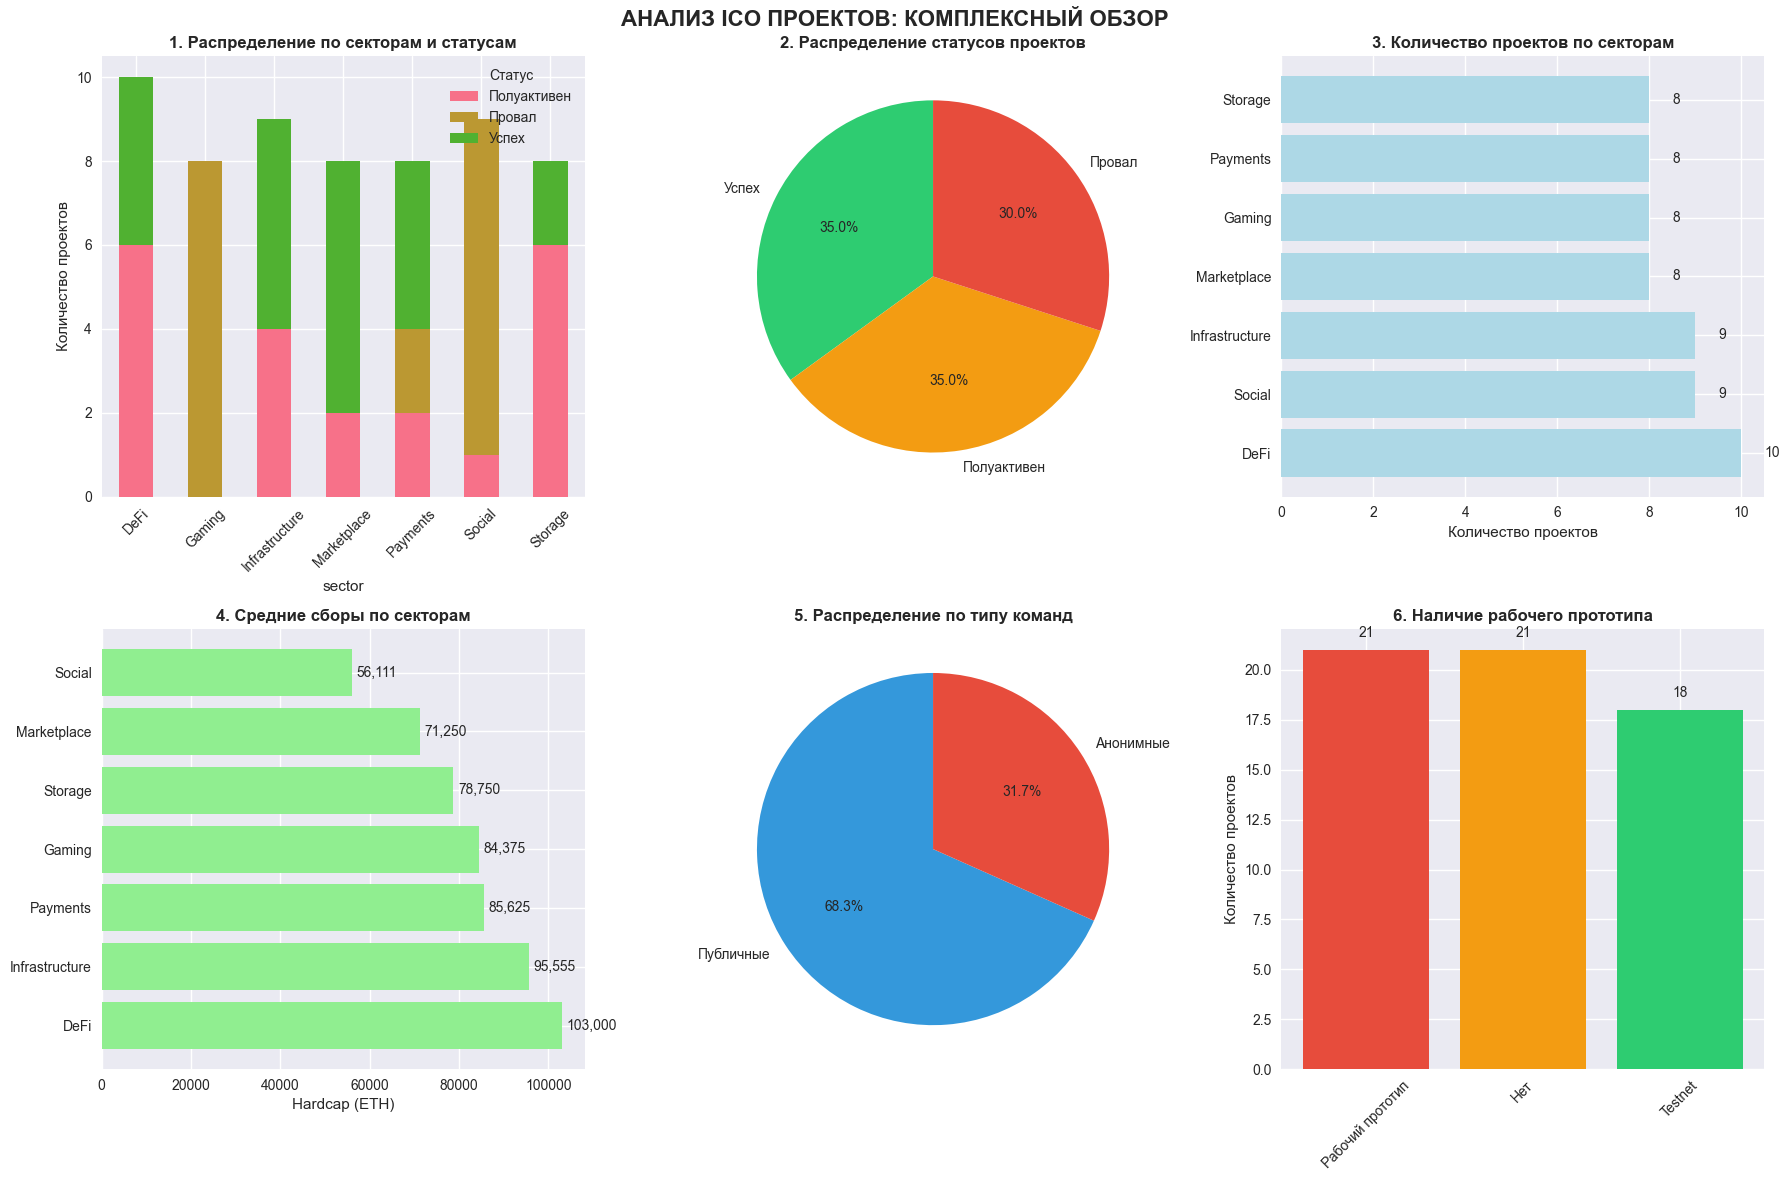

In [28]:
# Создаем фигуру с 6 графиками
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('АНАЛИЗ ICO ПРОЕКТОВ: КОМПЛЕКСНЫЙ ОБЗОР', fontsize=16, fontweight='bold')

# 1. Распределение проектов по секторам и статусам
status_by_sector = pd.crosstab(df_clean['sector'], df_clean['current_status_2024'])
status_by_sector.plot(kind='bar', ax=axes[0, 0], stacked=True)
axes[0, 0].set_title('1. Распределение по секторам и статусам', fontweight='bold')
axes[0, 0].set_ylabel('Количество проектов')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend(title='Статус')

# 2. Распределение статусов проектов (круговая диаграмма)
status_counts = df_clean['current_status_2024'].value_counts()
colors = ['#2ecc71', '#f39c12', '#e74c3c']
axes[0, 1].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', 
               colors=colors, startangle=90)
axes[0, 1].set_title('2. Распределение статусов проектов', fontweight='bold')

# 3. Количество проектов по секторам (исправленный barplot)
sector_counts = df_clean['sector'].value_counts()
bars = axes[0, 2].barh(range(len(sector_counts)), sector_counts.values, color='lightblue')
axes[0, 2].set_yticks(range(len(sector_counts)))
axes[0, 2].set_yticklabels(sector_counts.index)
axes[0, 2].set_title('3. Количество проектов по секторам', fontweight='bold')
axes[0, 2].set_xlabel('Количество проектов')

# Добавляем значения на столбцы
for i, bar in enumerate(bars):
    axes[0, 2].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                   str(int(bar.get_width())), ha='left', va='center')

# 4. Средние суммы сборов по секторам
sector_hardcap = df_clean.groupby('sector')['hardcap'].mean().sort_values(ascending=False)
bars = axes[1, 0].barh(range(len(sector_hardcap)), sector_hardcap.values, color='lightgreen')
axes[1, 0].set_yticks(range(len(sector_hardcap)))
axes[1, 0].set_yticklabels(sector_hardcap.index)
axes[1, 0].set_title('4. Средние сборы по секторам', fontweight='bold')
axes[1, 0].set_xlabel('Hardcap (ETH)')

# Добавляем значения на столбцы
for i, bar in enumerate(bars):
    axes[1, 0].text(bar.get_width() + 1000, bar.get_y() + bar.get_height()/2, 
                   f'{int(bar.get_width()):,}', ha='left', va='center')

# 5. Количество по анонимности команд (круговая диаграмма)
team_counts = df_clean['team_doxxed'].value_counts()
team_labels = ['Публичные', 'Анонимные']
team_colors = ['#3498db', '#e74c3c']
axes[1, 1].pie(team_counts.values, labels=team_labels, autopct='%1.1f%%', 
               colors=team_colors, startangle=90)
axes[1, 1].set_title('5. Распределение по типу команд', fontweight='bold')

# 6. Количество по прототипам (исправленный barplot)
mvp_counts = df_clean['mvp_status'].value_counts()
bars = axes[1, 2].bar(range(len(mvp_counts)), mvp_counts.values, color=['#e74c3c', '#f39c12', '#2ecc71'])
axes[1, 2].set_xticks(range(len(mvp_counts)))
axes[1, 2].set_xticklabels(mvp_counts.index, rotation=45)
axes[1, 2].set_title('6. Наличие рабочего прототипа', fontweight='bold')
axes[1, 2].set_ylabel('Количество проектов')

# Добавляем значения на столбцы
for i, bar in enumerate(bars):
    axes[1, 2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                   str(int(bar.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [30]:
from pathlib import Path

# Создаем единую папку dashboard
dashboard_path = Path("dashboard")
dashboard_path.mkdir(exist_ok=True)

print("📁 СОЗДАНА ПАПКА DASHBOARD:")
for item in dashboard_path.iterdir():
    print(f"  📄 {item.name}")

📁 СОЗДАНА ПАПКА DASHBOARD:


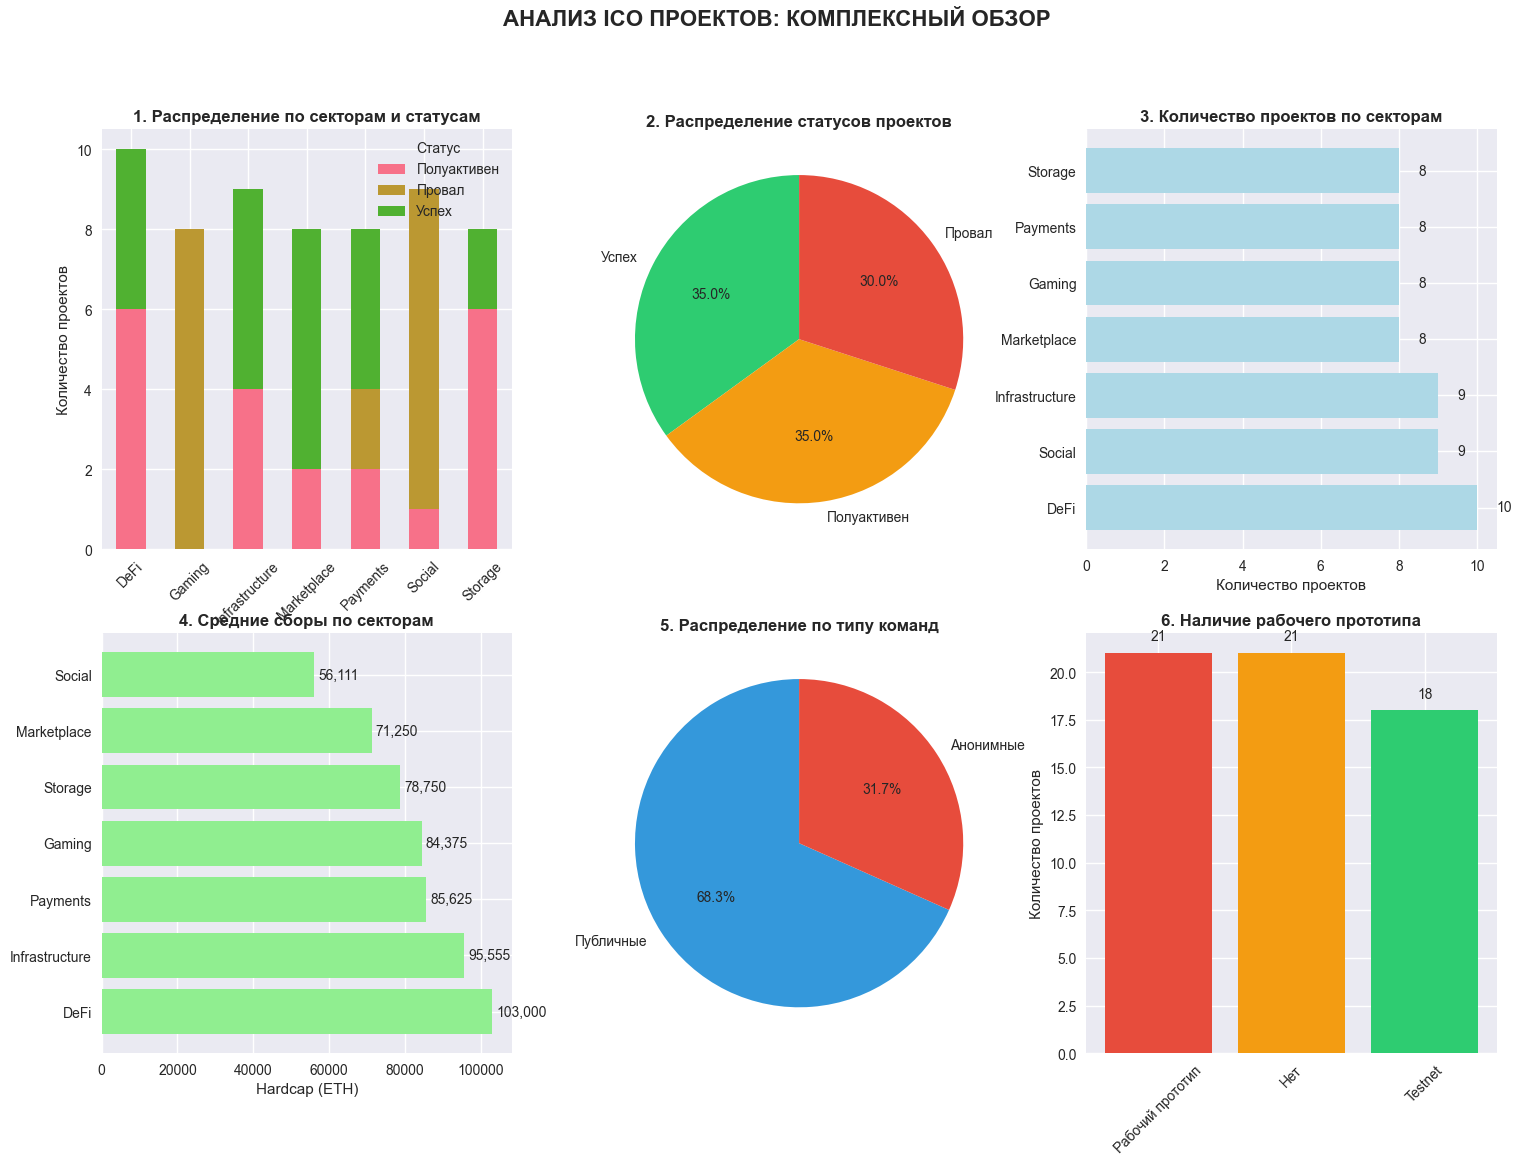

✅ Python визуализация сохранена: dashboard/python_visualization.png


In [31]:
# Создаем и сохраняем финальный график
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('АНАЛИЗ ICO ПРОЕКТОВ: КОМПЛЕКСНЫЙ ОБЗОР', fontsize=16, fontweight='bold')

# 1. Распределение проектов по секторам и статусам
status_by_sector = pd.crosstab(df_clean['sector'], df_clean['current_status_2024'])
status_by_sector.plot(kind='bar', ax=axes[0, 0], stacked=True)
axes[0, 0].set_title('1. Распределение по секторам и статусам', fontweight='bold')
axes[0, 0].set_ylabel('Количество проектов')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend(title='Статус')

# 2. Распределение статусов проектов
status_counts = df_clean['current_status_2024'].value_counts()
colors = ['#2ecc71', '#f39c12', '#e74c3c']
axes[0, 1].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', 
               colors=colors, startangle=90)
axes[0, 1].set_title('2. Распределение статусов проектов', fontweight='bold')

# 3. Количество проектов по секторам
sector_counts = df_clean['sector'].value_counts()
bars = axes[0, 2].barh(range(len(sector_counts)), sector_counts.values, color='lightblue')
axes[0, 2].set_yticks(range(len(sector_counts)))
axes[0, 2].set_yticklabels(sector_counts.index)
axes[0, 2].set_title('3. Количество проектов по секторам', fontweight='bold')
axes[0, 2].set_xlabel('Количество проектов')
for i, bar in enumerate(bars):
    axes[0, 2].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                   str(int(bar.get_width())), ha='left', va='center')

# 4. Средние сборы по секторам
sector_hardcap = df_clean.groupby('sector')['hardcap'].mean().sort_values(ascending=False)
bars = axes[1, 0].barh(range(len(sector_hardcap)), sector_hardcap.values, color='lightgreen')
axes[1, 0].set_yticks(range(len(sector_hardcap)))
axes[1, 0].set_yticklabels(sector_hardcap.index)
axes[1, 0].set_title('4. Средние сборы по секторам', fontweight='bold')
axes[1, 0].set_xlabel('Hardcap (ETH)')
for i, bar in enumerate(bars):
    axes[1, 0].text(bar.get_width() + 1000, bar.get_y() + bar.get_height()/2, 
                   f'{int(bar.get_width()):,}', ha='left', va='center')

# 5. Распределение по типу команд
team_counts = df_clean['team_doxxed'].value_counts()
team_labels = ['Публичные', 'Анонимные']
team_colors = ['#3498db', '#e74c3c']
axes[1, 1].pie(team_counts.values, labels=team_labels, autopct='%1.1f%%', 
               colors=team_colors, startangle=90)
axes[1, 1].set_title('5. Распределение по типу команд', fontweight='bold')

# 6. Наличие рабочего прототипа
mvp_counts = df_clean['mvp_status'].value_counts()
bars = axes[1, 2].bar(range(len(mvp_counts)), mvp_counts.values, color=['#e74c3c', '#f39c12', '#2ecc71'])
axes[1, 2].set_xticks(range(len(mvp_counts)))
axes[1, 2].set_xticklabels(mvp_counts.index, rotation=45)
axes[1, 2].set_title('6. Наличие рабочего прототипа', fontweight='bold')
axes[1, 2].set_ylabel('Количество проектов')
for i, bar in enumerate(bars):
    axes[1, 2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                   str(int(bar.get_height())), ha='center', va='bottom')

# Сохраняем в папку dashboard
viz_path = "dashboard/python_visualization.png"
plt.savefig(viz_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Python визуализация сохранена: {viz_path}")

In [32]:
from pathlib import Path

def show_project_structure():
    """Показывает текущую структуру проекта"""
    print("📁 ТЕКУЩАЯ СТРУКТУРА ПРОЕКТА:")
    
    project_root = Path(".")
    for item in sorted(project_root.iterdir()):
        if item.is_dir():
            print(f"📁 {item.name}/")
            # Показываем содержимое основных папок
            if item.name in ['data', 'analysis', 'dashboard']:
                for subitem in sorted(item.iterdir()):
                    if subitem.is_dir():
                        print(f"   📁 {subitem.name}/")
                    else:
                        print(f"   📄 {subitem.name}")
        else:
            print(f"📄 {item.name}")

show_project_structure()

📁 ТЕКУЩАЯ СТРУКТУРА ПРОЕКТА:
📄 .gitignore
📁 .ipynb_checkpoints/
📁 analysis/
   📁 .ipynb_checkpoints/
   📄 ico_analysis.ipynb
📁 dashboard/
   📄 python_visualization.png
📁 data/
   📁 examples/
   📁 processed/
   📁 raw/
📁 docs/
📄 requirements.txt


In [33]:
import subprocess
import os

# Проверяем текущую папку
print("📍 ТЕКУЩАЯ ПАПКА ПРОЕКТА:")
print(f"{os.getcwd()}")

# Проверяем есть ли Git репозиторий
try:
    result = subprocess.run(['git', 'status'], capture_output=True, text=True)
    if result.returncode == 0:
        print("✅ Git репозиторий уже инициализирован")
        print(result.stdout)
    else:
        print("❌ Git репозиторий не инициализирован")
except Exception as e:
    print(f"❌ Git не установлен или ошибка: {e}")

📍 ТЕКУЩАЯ ПАПКА ПРОЕКТА:
C:\Users\mashenike\ico_data_pipeline
✅ Git репозиторий уже инициализирован
On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../.anaconda/
	../.conda/
	../.condarc
	../.continuum/
	../.ipynb_checkpoints/
	../.ipython/
	../.jupyter/
	../.matplotlib/
	../.virtual_documents/
	../00_s.ipynb
	../00_setup.ipynb
	../01_regional_analysis.ipynb
	../02_skills_analysis.ipynb
	../03_employers_analysis.ipynb
	../04_salary_analysis.ipynb
	../05_time_analysis.ipynb
	../06_levels_analysis.ipynb
	../07_text_analysis.ipynb
	../08_conclusions.ipynb
	../AppData/
	../Contacts/
	../Desktop/
	../Documents/
	../Downloads/
	../Favorites/
	../Links/
	../Music/
	../NTUSER.DAT
	../NTUSER.DAT{7145e5f4-c51b-11ef-9301-fbee313e2c41}.TM.blf
	../NTUSER.DAT{7145e5f4-c51b-11ef-9301-fbee313e2c41}.TMContainer00000000000000000001.regtrans-ms
	../NTUSER.DAT{7145e5f4-c51b-11ef-9301-fbee313e2c41}.TMContainer00000000000000000002.regtrans

In [34]:
import os
from pathlib import Path

# Переходим в правильную папку (если нужно)
correct_path = Path("C:/Users/mashenike/ico_data_pipeline")
os.chdir(correct_path)

print("📍 ПРОВЕРЯЕМ ПРАВИЛЬНУЮ ПАПКУ:")
print(f"Текущая папка: {os.getcwd()}")

# Проверяем только файлы нашего проекта
print("\n📁 ФАЙЛЫ НАШЕГО ПРОЕКТА:")
project_files = list(Path(".").glob("*"))
for item in project_files:
    if item.is_dir():
        print(f"📁 {item.name}/")
    else:
        print(f"📄 {item.name}")

# Проверяем git status только для нашего проекта
print("\n🔍 ПРОВЕРЯЕМ GIT STATUS ДЛЯ ПРОЕКТА:")
try:
    result = subprocess.run(['git', 'status'], capture_output=True, text=True, cwd=correct_path)
    print(result.stdout)
except Exception as e:
    print(f"Ошибка: {e}")

📍 ПРОВЕРЯЕМ ПРАВИЛЬНУЮ ПАПКУ:
Текущая папка: C:\Users\mashenike\ico_data_pipeline

📁 ФАЙЛЫ НАШЕГО ПРОЕКТА:
📄 .gitignore
📁 .ipynb_checkpoints/
📁 analysis/
📁 dashboard/
📁 data/
📁 docs/
📄 requirements.txt

🔍 ПРОВЕРЯЕМ GIT STATUS ДЛЯ ПРОЕКТА:
On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../.anaconda/
	../.conda/
	../.condarc
	../.continuum/
	../.ipynb_checkpoints/
	../.ipython/
	../.jupyter/
	../.matplotlib/
	../.virtual_documents/
	../00_s.ipynb
	../00_setup.ipynb
	../01_regional_analysis.ipynb
	../02_skills_analysis.ipynb
	../03_employers_analysis.ipynb
	../04_salary_analysis.ipynb
	../05_time_analysis.ipynb
	../06_levels_analysis.ipynb
	../07_text_analysis.ipynb
	../08_conclusions.ipynb
	../AppData/
	../Contacts/
	../Desktop/
	../Documents/
	../Downloads/
	../Favorites/
	../Links/
	../Music/
	../NTUSER.DAT
	../NTUSER.DAT{7145e5f4-c51b-11ef-9301-fbee313e2c41}.TM.blf
	../NTUSER.DAT{7145e5f4-c51b-11ef-9301-fbee313e2c41

In [35]:
import shutil
from pathlib import Path

# Удаляем старый .git если он есть в неправильном месте
home_git = Path("C:/Users/mashenike/.git")
if home_git.exists():
    try:
        shutil.rmtree(home_git)
        print("✅ Удалили старый .git из домашней папки")
    except Exception as e:
        print(f"⚠️ Не удалось удалить: {e}")

# Удаляем .git из текущей папки если есть
current_git = Path(".git")
if current_git.exists():
    shutil.rmtree(current_git)
    print("✅ Удалили .git из текущей папки")

# Инициализируем новый Git репозиторий в текущей папке
try:
    result = subprocess.run(['git', 'init'], capture_output=True, text=True)
    if result.returncode == 0:
        print("✅ Новый Git репозиторий инициализирован")
    else:
        print(f"❌ Ошибка: {result.stderr}")
except Exception as e:
    print(f"❌ Ошибка: {e}")

# Проверяем статус
print("\n🔍 ПРОВЕРЯЕМ НОВЫЙ GIT STATUS:")
try:
    result = subprocess.run(['git', 'status'], capture_output=True, text=True)
    print(result.stdout)
except Exception as e:
    print(f"Ошибка: {e}")

✅ Удалили старый .git из домашней папки
✅ Новый Git репозиторий инициализирован

🔍 ПРОВЕРЯЕМ НОВЫЙ GIT STATUS:
On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.gitignore
	analysis/
	dashboard/
	data/
	docs/
	requirements.txt

nothing added to commit but untracked files present (use "git add" to track)



In [36]:
# Добавляем все файлы проекта в Git
try:
    result = subprocess.run(['git', 'add', '.'], capture_output=True, text=True)
    if result.returncode == 0:
        print("✅ Все файлы проекта добавлены в Git")
    else:
        print(f"❌ Ошибка при добавлении: {result.stderr}")
except Exception as e:
    print(f"❌ Ошибка: {e}")

# Проверяем статус после добавления
print("\n🔍 ПРОВЕРЯЕМ STATUS ПОСЛЕ ДОБАВЛЕНИЯ:")
try:
    result = subprocess.run(['git', 'status'], capture_output=True, text=True)
    print(result.stdout)
except Exception as e:
    print(f"Ошибка: {e}")

✅ Все файлы проекта добавлены в Git

🔍 ПРОВЕРЯЕМ STATUS ПОСЛЕ ДОБАВЛЕНИЯ:
On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   .gitignore
	new file:   analysis/.ipynb_checkpoints/ico_analysis-checkpoint.ipynb
	new file:   analysis/ico_analysis.ipynb
	new file:   dashboard/python_visualization.png
	new file:   data/processed/cleaned_projects.csv
	new file:   data/processed/final_dataset.csv
	new file:   data/processed/project_keywords.csv
	new file:   data/processed/projects_dataset.csv
	new file:   data/raw/ISO_project (1).txt
	new file:   data/raw/ISO_project (10).txt
	new file:   data/raw/ISO_project (11).txt
	new file:   data/raw/ISO_project (12).txt
	new file:   data/raw/ISO_project (13).txt
	new file:   data/raw/ISO_project (14).txt
	new file:   data/raw/ISO_project (15).txt
	new file:   data/raw/ISO_project (16).txt
	new file:   data/raw/ISO_project (17).txt
	new file:   data/raw/ISO_project (18).txt
	new file:   d

In [37]:
# Удаляем временные файлы из Git
try:
    # Удаляем папку с checkpoint файлами
    result = subprocess.run(['git', 'rm', '-r', '--cached', 'analysis/.ipynb_checkpoints'], 
                          capture_output=True, text=True)
    print("✅ Удалили временные файлы из Git")
    
    # Проверяем что осталось
    result = subprocess.run(['git', 'status'], capture_output=True, text=True)
    print("🔍 ТЕКУЩИЙ STATUS:")
    print(result.stdout)
    
except Exception as e:
    print(f"❌ Ошибка: {e}")

✅ Удалили временные файлы из Git
🔍 ТЕКУЩИЙ STATUS:
On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   .gitignore
	new file:   analysis/ico_analysis.ipynb
	new file:   dashboard/python_visualization.png
	new file:   data/processed/cleaned_projects.csv
	new file:   data/processed/final_dataset.csv
	new file:   data/processed/project_keywords.csv
	new file:   data/processed/projects_dataset.csv
	new file:   data/raw/ISO_project (1).txt
	new file:   data/raw/ISO_project (10).txt
	new file:   data/raw/ISO_project (11).txt
	new file:   data/raw/ISO_project (12).txt
	new file:   data/raw/ISO_project (13).txt
	new file:   data/raw/ISO_project (14).txt
	new file:   data/raw/ISO_project (15).txt
	new file:   data/raw/ISO_project (16).txt
	new file:   data/raw/ISO_project (17).txt
	new file:   data/raw/ISO_project (18).txt
	new file:   data/raw/ISO_project (19).txt
	new file:   data/raw/ISO_project (2).txt
	new file:   data/raw/I

In [38]:
# Добавляем изменения в ноутбук
try:
    result = subprocess.run(['git', 'add', 'analysis/ico_analysis.ipynb'], 
                          capture_output=True, text=True)
    print("✅ Добавили изменения в ноутбук")
    
    # Создаем первый коммит
    result = subprocess.run(['git', 'commit', '-m', 'Initial commit: ICO Data Analysis Pipeline - Complete project with data parsing, analysis, and visualization'], 
                          capture_output=True, text=True)
    if result.returncode == 0:
        print("✅ Первый коммит создан!")
        print(result.stdout)
    else:
        print(f"❌ Ошибка коммита: {result.stderr}")
        
except Exception as e:
    print(f"❌ Ошибка: {e}")

# Проверяем статус после коммита
print("\n🔍 СТАТУС ПОСЛЕ КОММИТА:")
try:
    result = subprocess.run(['git', 'status'], capture_output=True, text=True)
    print(result.stdout)
except Exception as e:
    print(f"Ошибка: {e}")

✅ Добавили изменения в ноутбук
❌ Ошибка коммита: Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'mashenike@TURBOPOWER.(none)')


🔍 СТАТУС ПОСЛЕ КОММИТА:
On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   .gitignore
	new file:   analysis/ico_analysis.ipynb
	new file:   dashboard/python_visualization.png
	new file:   data/processed/cleaned_projects.csv
	new file:   data/processed/final_dataset.csv
	new file:   data/processed/project_keywords.csv
	new file:   data/processed/projects_dataset.csv
	new file:   data/raw/ISO_project (1).txt
	new file:   data/raw/ISO_project (10).txt
	new file:   data/raw/ISO_project (11).txt
	new file:   data/raw/ISO_project (12).txt
	new

In [39]:
# Настраиваем пользователя Git
try:
    # Замените на ваш email и имя которые используете на GitHub
    email = "kapitanenko1234@gmail.com"  # 👈 ЗАМЕНИТЕ на ваш реальный email
    name = "kapitanenko1234-web"                # 👈 ЗАМЕНИТЕ на ваше имя
    
    result = subprocess.run(['git', 'config', 'user.email', email], 
                          capture_output=True, text=True)
    result = subprocess.run(['git', 'config', 'user.name', name], 
                          capture_output=True, text=True)
    
    print("✅ Настроили пользователя Git")
    print(f"   Email: {email}")
    print(f"   Name: {name}")
    
    # Проверяем настройки
    result_email = subprocess.run(['git', 'config', 'user.email'], 
                                capture_output=True, text=True)
    result_name = subprocess.run(['git', 'config', 'user.name'], 
                               capture_output=True, text=True)
    print(f"   Проверка - Email: {result_email.stdout.strip()}")
    print(f"   Проверка - Name: {result_name.stdout.strip()}")
    
except Exception as e:
    print(f"❌ Ошибка: {e}")

✅ Настроили пользователя Git
   Email: kapitanenko1234@gmail.com
   Name: kapitanenko1234-web
   Проверка - Email: kapitanenko1234@gmail.com
   Проверка - Name: kapitanenko1234-web


In [40]:
# Создаем коммит с настроенным пользователем
try:
    result = subprocess.run(['git', 'commit', '-m', 'Initial commit: ICO Data Analysis Pipeline - Complete project with data parsing, analysis, and visualization'], 
                          capture_output=True, text=True)
    if result.returncode == 0:
        print("✅ ПЕРВЫЙ КОММИТ СОЗДАН!")
        print("📦 Проект сохранен в Git")
        
        # Проверяем статус
        result = subprocess.run(['git', 'status'], capture_output=True, text=True)
        print("\n🔍 ФИНАЛЬНЫЙ СТАТУС:")
        print(result.stdout)
        
    else:
        print(f"❌ Ошибка коммита: {result.stderr}")
        
except Exception as e:
    print(f"❌ Ошибка: {e}")

# Показываем что у нас есть
print("\n📁 СОДЕРЖИМОЕ ПРОЕКТА:")
from pathlib import Path
for item in Path(".").iterdir():
    if item.is_dir():
        print(f"📁 {item.name}/")
    else:
        print(f"📄 {item.name}")

✅ ПЕРВЫЙ КОММИТ СОЗДАН!
📦 Проект сохранен в Git

🔍 ФИНАЛЬНЫЙ СТАТУС:
On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   analysis/ico_analysis.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	analysis/.ipynb_checkpoints/

no changes added to commit (use "git add" and/or "git commit -a")


📁 СОДЕРЖИМОЕ ПРОЕКТА:
📁 .git/
📄 .gitignore
📁 .ipynb_checkpoints/
📁 analysis/
📁 dashboard/
📁 data/
📁 docs/
📄 requirements.txt


In [41]:
# Добавляем последние изменения и делаем финальный коммит
try:
    # Добавляем все изменения
    result = subprocess.run(['git', 'add', '.'], capture_output=True, text=True)
    print("✅ Добавили все изменения")
    
    # Финальный коммит
    result = subprocess.run(['git', 'commit', '-m', 'Final commit: Complete ICO analysis project with all visualizations and data'], 
                          capture_output=True, text=True)
    if result.returncode == 0:
        print("✅ ФИНАЛЬНЫЙ КОММИТ СОЗДАН!")
        
        # Показываем историю коммитов
        result = subprocess.run(['git', 'log', '--oneline'], capture_output=True, text=True)
        print("\n📜 ИСТОРИЯ КОММИТОВ:")
        print(result.stdout)
        
    else:
        print(f"❌ Ошибка: {result.stderr}")
        
except Exception as e:
    print(f"❌ Ошибка: {e}")

✅ Добавили все изменения
✅ ФИНАЛЬНЫЙ КОММИТ СОЗДАН!

📜 ИСТОРИЯ КОММИТОВ:
7fa2aef Final commit: Complete ICO analysis project with all visualizations and data
1e65ffc Initial commit: ICO Data Analysis Pipeline - Complete project with data parsing, analysis, and visualization

